In [76]:
import numpy as np
import tabula
import pandas as pd

In [77]:
makData = pd.read_csv("../Data/Private.csv", index_col=0)

In [78]:
makData

,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
APPLICATION NO,,,,,,,,,
23APF412304454141015,U0391/673,LUKABWE DOUGLAS MARK,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2
23APF345674424112360,U1249/532,LULE ISAAC,M,2022.0,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1
23APF1361730063122187,U0459/676,HAULAH SULAIT BIIRA,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6
23APF519647933132646,U1611/887,NAMBALYE EVELYNE,F,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8
23APF1481620160129238,U0083/555,KEMIGISHA RUSIA,F,2022.0,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4
...,...,...,...,...,...,...,...,...,...
23APF727648568141557,U0017/548,KIZZA VANESSA ITRONCE,F,2022.0,17.0,KAMULI,VET,B. Veterinary Medicine,41.8
23APF963075058135059,U0033/581,OTIM DANIEL,M,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,41.7
23APF1618205309130850,U0077/736,MUKETI JOVIA,F,2022.0,74.0,MARACHA,VET,B. Veterinary Medicine,41.6


In [79]:
makData = makData.astype({"TOTAL WEIGHT": 'float', "INDEX NO": "string"})

In [80]:
# Save df
makData.to_csv("../Data/Private.csv")

In [81]:
# Return admissions by ditrict and year of entry.
makData.groupby(['DISTRICT', 'UACE YEAR', 'GENDER'],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count().head(50)

DISTRICT  UACE YEAR  GENDER
ABIM      2017.0     M          1
          2018.0     F          1
          2019.0     F          1
                     M          1
          2020.0     M          1
          2022.0     F         11
                     M         10
ADJUMANI  2010.0     M          1
          2019.0     F          1
          2020.0     F          2
                     M          1
          2022.0     F         35
                     M         36
AGAGO     2009.0     M          1
          2011.0     M          1
          2020.0     M          3
          2022.0     F         15
                     M         18
ALEBTONG  2006.0     M          1
          2018.0     M          1
          2019.0     F          1
          2022.0     F          9
                     M         14
AMOLATAR  2022.0     F          4
                     M          6
AMUDAT    2022.0     M          2
AMURIA    2016.0     M          1
          2019.0     F          1
          2020.0    

In [82]:
# 
regions = {"Eastern": ['Amuria', 'Budaka', 'Bududa', 'Bugiri', 'Bukedea', 'Bukwa', 'Bulambuli',
                      'Busia', 'Butalega', 'Buyende', 'Iganga', 'Jinja', 'Kaberamaido', 'Kamuli', 'Kaliro',
                      'Kapchorwa', 'Katakwi', 'Kibuku', 'Kumi', 'Kween', 'Luuka', 'Manafwa',
                       'Mayuge', 'Mbale', 'Namayingo', 'Namutumba', 'Ngora', 'Pallisa', 'Serere',
                      'Sironko', 'Soroti', 'Tororo'],
          'Central': ['Buikwe', 'Bukomansimbi', 'Butambala', 'Buvuma', 'Gomba', 'Kalangala', 'Kalungu',
                     'Kampala', 'Kayunga', 'Kiboga', 'Kyankwazi', 'Luwero', 'Lwengo', 'Lyantonde',
                     'Masaka', 'Mityana', 'Mpigi', 'Mubende', 'Mukono', 'Nakaseke', 'Nakasongola',
                     'Rakai', 'Sembabule', 'Wakiso'],
          'Northern': ['Abim', 'Adjumani', 'Agago', 'Alebtong', 'Amolator', 'Amudat', 'Amuru', 'Apac',
                      'Arua', 'Dokolo', 'Gulu', 'Kaabong', 'Kitgum', 'Koboko', 'Kole', 'Kotido', 
                      'Lamwo', 'Lira', 'Maracha', 'Moroto', 'Moyo', 'Nakapiripiriti', 'Napak', 'Nebbi',
                      'Nwoya', 'Otuke', 'Oyam', 'Pader', 'Yumbe', 'Zombe'],
          'Western': ['Buhweju', 'Bulisa', 'Bundibugyo', 'Bushenyi', 'Hoima', 'Ibanda', 'Isingiro',
                     'Kabale', 'Kabarole', 'Kamwenge', 'Kanungu', 'Kasese', 'Kibaale', 'kiruhura', 'Kiryandongo',
                     'Kisoro', 'Kyengegwa', 'Masindi', 'Mbarara', 'Mitooma', 'Ntoroko', 'Ntungamo', 'Ribirizi',
                     'Rukungiri', 'Sheema']}
for key, value in regions.items():
    for i in range(len(value)):
        value[i] = value[i].upper()

In [83]:
regions

{'Eastern': ['AMURIA',
  'BUDAKA',
  'BUDUDA',
  'BUGIRI',
  'BUKEDEA',
  'BUKWA',
  'BULAMBULI',
  'BUSIA',
  'BUTALEGA',
  'BUYENDE',
  'IGANGA',
  'JINJA',
  'KABERAMAIDO',
  'KAMULI',
  'KALIRO',
  'KAPCHORWA',
  'KATAKWI',
  'KIBUKU',
  'KUMI',
  'KWEEN',
  'LUUKA',
  'MANAFWA',
  'MAYUGE',
  'MBALE',
  'NAMAYINGO',
  'NAMUTUMBA',
  'NGORA',
  'PALLISA',
  'SERERE',
  'SIRONKO',
  'SOROTI',
  'TORORO'],
 'Central': ['BUIKWE',
  'BUKOMANSIMBI',
  'BUTAMBALA',
  'BUVUMA',
  'GOMBA',
  'KALANGALA',
  'KALUNGU',
  'KAMPALA',
  'KAYUNGA',
  'KIBOGA',
  'KYANKWAZI',
  'LUWERO',
  'LWENGO',
  'LYANTONDE',
  'MASAKA',
  'MITYANA',
  'MPIGI',
  'MUBENDE',
  'MUKONO',
  'NAKASEKE',
  'NAKASONGOLA',
  'RAKAI',
  'SEMBABULE',
  'WAKISO'],
 'Northern': ['ABIM',
  'ADJUMANI',
  'AGAGO',
  'ALEBTONG',
  'AMOLATOR',
  'AMUDAT',
  'AMURU',
  'APAC',
  'ARUA',
  'DOKOLO',
  'GULU',
  'KAABONG',
  'KITGUM',
  'KOBOKO',
  'KOLE',
  'KOTIDO',
  'LAMWO',
  'LIRA',
  'MARACHA',
  'MOROTO',
  'MOYO',
  '

In [124]:
makData.groupby(['DISTRICT', 
                 # 'UACE YEAR', 
                 # 'GENDER',
                ],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count().head(50)

DISTRICT
ABIM              26
ADJUMANI          76
AGAGO             38
ALEBTONG          26
AMOLATAR          10
AMUDAT             2
AMURIA            44
AMURU             20
APAC              56
ARUA             172
BUDAKA            60
BUDUDA            36
BUGIRI            92
BUHWEJU           32
BUIKWE           216
BUKEDEA           72
BUKOMANSIMBI      74
BUKWO             20
BULAMBULI         28
BULIISA           22
BUNDIBUGYO        22
BUNYANGABU        36
BUSHENYI         331
BUSIA            216
BUTALEJA          68
BUTAMBALA        111
BUTEBO            10
BUVUMA             2
BUYENDE           24
DOKOLO            24
GOMBA             92
GULU             170
HOIMA            236
IBANDA           213
IGANGA           213
ISINGIRO         191
JINJA            299
KAABONG           12
KABALE           243
KABAROLE         225
KABERAMAIDO       48
KAGADI            46
KAKUMIRO          35
KALANGALA          8
KALIRO            41
KALUNGU           63
KAMPALA         1059
KAMU

In [85]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
grouped = s.groupby(level=0)

In [86]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [87]:
# Sorting process consumes processor resources, for potential speedup, 
# the sorting option can be disabled.
makData.groupby(['DISTRICT', 'UACE YEAR', 'GENDER'],
                sort=True,
#               axis="columns"
#                 as_index=False
                           )['INDEX NO'].last()

DISTRICT  UACE YEAR  GENDER
ABIM      2017.0     M         U0660/516
          2018.0     F         U2924/502
          2019.0     F         U0018/766
                     M         U1244/619
          2020.0     M         U1698/541
                                 ...    
ZOMBO     2014.0     M         U0109/659
          2016.0     M         U1443/521
          2020.0     M         U1609/771
          2022.0     F         U1207/572
                     M         U1224/688
Name: INDEX NO, Length: 917, dtype: string

In [88]:
# Getting admitted Students from IGANGA district
makData.groupby(["DISTRICT"]).get_group(('IGANGA', ))

,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
APPLICATION NO,,,,,,,,,
23APF980625096133316,U0737/531,MUDOBYA CHRISTINE,F,2007.0,10.0,IGANGA,ACC,BSC. Accounting (EVE),34.6
23APF271115874132692,U1879/641,NAKIYEMBA PHIONA,F,2022.0,10.0,IGANGA,ACC,BSC. Accounting (EVE),30.3
23APF825010272123233,U0061/552,MUTESI SHADIA,F,2022.0,10.0,IGANGA,ACC,BSC. Accounting (EVE),28.6
23APF1502921010146109,U1525/532,KASADHA NATHAN,M,2022.0,10.0,IGANGA,ACC,BSC. Accounting (EVE),25.0
23APF6816076136686,U0812/509,KASADHA AUSI,M,2022.0,10.0,IGANGA,ACC,BSC. Accounting (EVE),19.9
...,...,...,...,...,...,...,...,...,...
23APF767968007139054,U0110/554,ASHA ISMAEL KANTONO,F,2022.0,10.0,IGANGA,TLM,B.Transport and Logistics Management (EVE),19.8
23APF457993029146229,U0806/555,WATEMA ANDREW CHRISTIAN,M,2022.0,10.0,IGANGA,TTM,B.Travel and Tourism Management (EVE),25.4
23APF1019156265113557,U0966/517,NAKKU PROSSY,F,2022.0,10.0,IGANGA,TTM,B.Travel and Tourism Management (EVE),21.8


In [89]:
# This returns unique year counts for each district
makData.groupby("DISTRICT")['UACE YEAR'].nunique()

DISTRICT
ABIM         5
ADJUMANI     4
AGAGO        4
ALEBTONG     4
AMOLATAR     1
            ..
SOROTI      11
TORORO      13
WAKISO      15
YUMBE        2
ZOMBO        4
Name: UACE YEAR, Length: 123, dtype: int64

In [90]:
makData.groupby(['DISTRICT', 'GENDER', 'UACE YEAR']
#                 ,as_index=False
               )['UACE YEAR'].agg('count')

DISTRICT  GENDER  UACE YEAR
ABIM      F       2018.0        1
                  2019.0        1
                  2022.0       11
          M       2017.0        1
                  2019.0        1
                               ..
ZOMBO     F       2022.0       10
          M       2014.0        1
                  2016.0        1
                  2020.0        1
                  2022.0       15
Name: UACE YEAR, Length: 917, dtype: int64

In [91]:
def get_school_indexNo(studentIndex):
    return str(studentIndex)[:5]

In [92]:
# This adds a column named 'School Index' computed from student Index Number
makData['SCHOOL INDEX'] = makData['INDEX NO'].apply(get_school_indexNo)

In [93]:
# Group by district, school Index, UACE year, Gender and return count for data
makData.groupby(['DISTRICT', 'SCHOOL INDEX', 'UACE YEAR', 'GENDER'])['GENDER'].count().tail(35)

DISTRICT  SCHOOL INDEX  UACE YEAR  GENDER
YUMBE     U0459         2022.0     M         1
          U0630         2022.0     F         1
          U0857         2022.0     M         1
          U0896         2022.0     F         1
          U1072         2022.0     M         1
          U1354         2022.0     F         1
          U2596         2022.0     F         1
          U2789         2022.0     F         1
          U2924         2022.0     F         1
ZOMBO     U0069         2022.0     M         1
          U0085         2022.0     F         1
          U0102         2022.0     M         1
          U0109         2014.0     M         1
          U0245         2022.0     F         1
          U0818         2022.0     M         1
          U0913         2022.0     F         1
          U0922         2022.0     M         1
          U1085         2022.0     F         1
          U1104         2022.0     F         1
                                   M         2
          U1107   

In [94]:
# Regions
def get_region(district):
    for regions_names, districts in regions.items():
        if district in regions[regions_names]:
            return regions_names

In [95]:
# Data table with regions
makData['REGION'] = makData['DISTRICT'].apply(get_region)

In [96]:
makData.groupby(['REGION', 'DISTRICT', 'SCHOOL INDEX', 'GENDER'])['NAME'].count()

REGION   DISTRICT  SCHOOL INDEX  GENDER
Central  BUIKWE    U0005         F         1
                   U0013         F         1
                   U0017         F         1
                   U0018         F         2
                                 M         1
                                          ..
Western  SHEEMA    U3614         M         3
                   U3740         F         1
                   U3845         F         1
                   U3886         F         1
                                 M         1
Name: NAME, Length: 8309, dtype: int64

In [97]:
[makData.groupby('REGION')['DISTRICT'].count()]

[REGION
 Central     5584
 Eastern     2662
 Northern    1174
 Western     4250
 Name: DISTRICT, dtype: int64]

In [98]:
# counts of admissions per region
regionalAdmissions = makData.groupby('REGION')["GENDER"].apply('count')

In [99]:
regionalAdmissions

REGION
Central     5584
Eastern     2662
Northern    1174
Western     4250
Name: GENDER, dtype: int64

In [100]:
# data = list(regionalAdmissions.ndarray)

In [101]:
# data

In [102]:
regionalAdmissions = pd.DataFrame(data=regionalAdmissions,
                                  # index=regionalAdmissions.index,
                                 )

In [103]:
regionalAdmissions

,GENDER
REGION,
Central,5584
Eastern,2662
Northern,1174
Western,4250


<Axes: ylabel='REGION'>

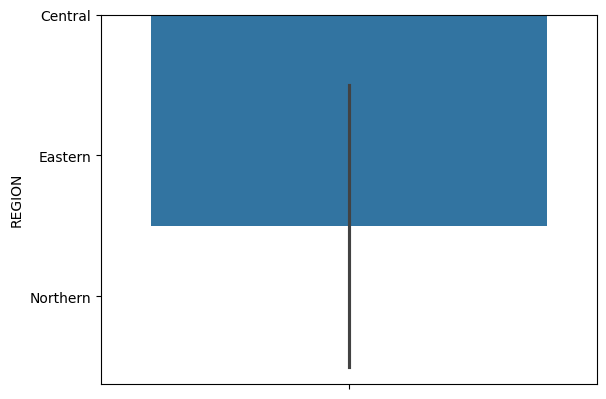

In [104]:
# visualize admissions by region
import seaborn as sns
sns.barplot(regionalAdmissions,
          y='REGION',
           )

In [105]:
# mean weight per course
makData.groupby(['COURSE NAME'])['TOTAL WEIGHT'].agg('mean')

COURSE NAME
B TRAVEL & TOURISM MGT, MBARARA (DAY)            27.387931
B. AGRICULTURAL & RURAL INNOVATION (EXTERNAL)    23.211628
B. Animal Produ.Techn Mgt                        29.420833
B. BUSINESS ADMINISTRATION, MBALE (DAY)          23.806897
B. BUSINESS COMPUTING, JINJA (DAY)               27.625926
                                                   ...    
Bachelor of Science with Education (Physical)    38.236232
Bachelor of Statistics                           33.905426
Bechelor of Industrial Art & Applied Design      38.403509
Bechelor of Leisure, Events and Hotel Mgt        27.791964
DIP.(Performing Arts)                            21.700000
Name: TOTAL WEIGHT, Length: 151, dtype: float64

In [106]:
grouped = makData.groupby(['REGION', 'DISTRICT'])['TOTAL WEIGHT']

In [107]:
# iterating over groups
for name, group in makData[[
                            'REGION',
                            'DISTRICT',
                            'SCHOOL INDEX',
                            'GENDER']].groupby('REGION'
#                                                , as_index=False
                                              ):
    print(name)
    print(group)

Central
                        REGION DISTRICT SCHOOL INDEX GENDER
APPLICATION NO                                             
23APF412304454141015   Central   MUKONO        U0391      M
23APF345674424112360   Central    MPIGI        U1249      M
23APF519647933132646   Central   MASAKA        U1611      F
23APF1501202078128326  Central   WAKISO        U2373      M
23APF1139056282132364  Central   KIBOGA        U0856      F
...                        ...      ...          ...    ...
23APF1087150200123994  Central  KAMPALA        U2119      M
23APF1019459175137320  Central   MUKONO        U1224      M
23APF947574098101599   Central   BUIKWE        U0391      M
23APF483949345129848   Central   BUIKWE        U2236      M
23APF938389388149879   Central   KIBOGA        U1224      M

[5584 rows x 4 columns]
Eastern
                        REGION DISTRICT SCHOOL INDEX GENDER
APPLICATION NO                                             
23APF231194390150185   Eastern   KAMULI        U0086      M

In [108]:
grouped.describe()

count       mean       std   min     25%    50%     75%  \
REGION  DISTRICT                                                                
Central BUIKWE        216.0  31.236574  7.753385   8.9  26.375  31.95  36.900   
        BUKOMANSIMBI   74.0  32.862162  7.536917  17.3  27.775  33.50  38.225   
        BUTAMBALA     111.0  33.960360  7.747589  13.9  28.950  34.30  39.700   
        BUVUMA          2.0  38.600000  5.374012  34.8  36.700  38.60  40.500   
        GOMBA          92.0  29.761957  8.560192  15.9  23.375  27.20  35.725   
...                     ...        ...       ...   ...     ...    ...     ...   
Western MITOOMA       137.0  30.435036  7.500702  15.8  25.000  30.60  35.600   
        NTOROKO         7.0  30.700000  8.546344  19.7  24.100  31.60  37.300   
        NTUNGAMO      459.0  30.825272  7.635213  12.2  25.600  30.20  35.950   
        RUKUNGIRI     331.0  31.689124  7.565404  12.7  26.100  31.10  37.400   
        SHEEMA        219.0  30.492694  8.288067  12.9  24.100  29.80  36.600   

                       max  
REGION  DISTRICT            
Central BUIKWE        46.0  
        BUKOMANSIMBI  51.9  
        BUTAMBALA     50.7  
        BUVUMA        42.4  
        GOMBA         51.6  
...                    ...  
Western MITOOMA       51.6  
        NTOROKO       40.8  
        NTUNGAMO      48.7  
        RUKUNGIRI     51.6  
        SHEEMA        49.0  

[101 rows x 8 columns]

In [109]:
# Top 10 student with highest total weight
def top(df, n=10, column='TOTAL WEIGHT'):
    return df.sort_values(column,
                         ascending=False)[:n]

In [110]:
# Returns the top 10 students with the highest total weight.
# Further analysis can be done to find statistics for this analysis.
top10 = top(makData, n=10)

In [127]:
top10.groupby(['SCHOOL INDEX',])['INDEX NO'].count()

SCHOOL INDEX
U0013    1
U0060    1
U0061    1
U0077    1
U0801    1
U0802    1
U1224    2
U1249    1
U2789    1
Name: INDEX NO, dtype: int64

In [112]:
# Top 10 distribution by Region, District and Gender
top10.groupby(['REGION', 'DISTRICT', 'GENDER'])['TOTAL WEIGHT'].count()

REGION    DISTRICT   GENDER
Central   KAYUNGA    M         1
          MASAKA     F         1
          MUKONO     F         1
          SEMBABULE  M         1
Eastern   KAMULI     F         1
          KAPCHORWA  F         1
Northern  LIRA       F         1
Western   KISORO     F         1
                     M         1
          MBARARA    M         1
Name: TOTAL WEIGHT, dtype: int64

In [113]:
makData.iloc[190]

INDEX NO                                  U0525/510
NAME                                 AHUMUZA BRENDA
GENDER                                            F
UACE YEAR                                    2022.0
CODE                                           12.0
DISTRICT                                     KABALE
COURSE CODE                                     ADM
COURSE NAME     Bachelor of Business Administration
TOTAL WEIGHT                                   45.4
SCHOOL INDEX                                  U0525
REGION                                      Western
Name: 23APF922973038147370, dtype: object

In [114]:
# last 10 students admitted by total weight
def last(df, n, column='TOTAL WEIGHT'):
    return df.sort_values(column,
                         ascending=True)[:n]

In [115]:
last10 = last(makData, n=10)

In [116]:
# This informs hidden patterns in socio-economic lives of people
# from this regions
last10.groupby(by=['REGION'])['NAME'].count()

REGION
Central     4
Eastern     1
Northern    2
Western     3
Name: NAME, dtype: int64

In [117]:
last10.groupby(['REGION', 'DISTRICT'])['TOTAL WEIGHT'].count()

REGION    DISTRICT
Central   BUIKWE      1
          KAMPALA     1
          WAKISO      2
Eastern   TORORO      1
Northern  ABIM        1
          GULU        1
Western   KAMWENGE    1
          KIRUHURA    1
          MBARARA     1
Name: TOTAL WEIGHT, dtype: int64

In [118]:
# Quartiles
# Quartiles are data categories thus data can be categorized
# using quartiles
quartiles = pd.cut(makData['TOTAL WEIGHT'],
                   4,
                   labels=["Very Low", "Low", "High", "Very High"])

In [119]:
quartiles

APPLICATION NO
23APF412304454141015     High
23APF345674424112360     High
23APF1361730063122187    High
23APF519647933132646     High
23APF1481620160129238    High
                         ... 
23APF727648568141557     High
23APF963075058135059     High
23APF1618205309130850    High
23APF575513287117711     High
23APF1477867021106233    High
Name: TOTAL WEIGHT, Length: 14915, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

In [120]:
# Grouping by quartiles
makData.groupby(quartiles)['TOTAL WEIGHT'].agg(["min", "max", "mean", "count"])

C:\Users\Kakaire Steven\AppData\Local\Temp\ipykernel_15572\3350520744.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  makData.groupby(quartiles)['TOTAL WEIGHT'].agg(["min", "max", "mean", "count"])


,min,max,mean,count
TOTAL WEIGHT,,,,
Very Low,8.9,20.1,17.641293,1160
Low,20.2,31.4,26.372179,6380
High,31.5,42.6,36.348959,6101
Very High,42.7,53.9,45.423783,1274


In [121]:
# I bin starting with 0, logically, none can be admitted with zero points
# bins = pd.IntervalIndex.from_tuples([(0, 20), (21, 30), (31, 40), (41, 55)])
bins = [0, 20, 30, 40, 55]
quartiles2 = pd.cut(makData['TOTAL WEIGHT'],
                     bins,
                     right=True,
#                      retbins=True,
                     labels=False)

In [122]:
# There is more the mind can explore and apply. Uncage your imagination
# and let it go wild.

In [123]:
quartiles2

APPLICATION NO
23APF412304454141015     3
23APF345674424112360     3
23APF1361730063122187    3
23APF519647933132646     2
23APF1481620160129238    2
                        ..
23APF727648568141557     3
23APF963075058135059     3
23APF1618205309130850    3
23APF575513287117711     3
23APF1477867021106233    3
Name: TOTAL WEIGHT, Length: 14915, dtype: int64